In [1]:
import altair as alt
from bayes_window.generative_models import *
from bayes_window.visualization import plot_data, plot_data_slope_trials
from bayes_window import BayesWindow, models, workflow
from importlib import reload
alt.renderers.enable('altair_saver', fmts=['png']);

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=40,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
df['log_isi'] = np.log10(df['isi'])


# data_details with posterior slopes

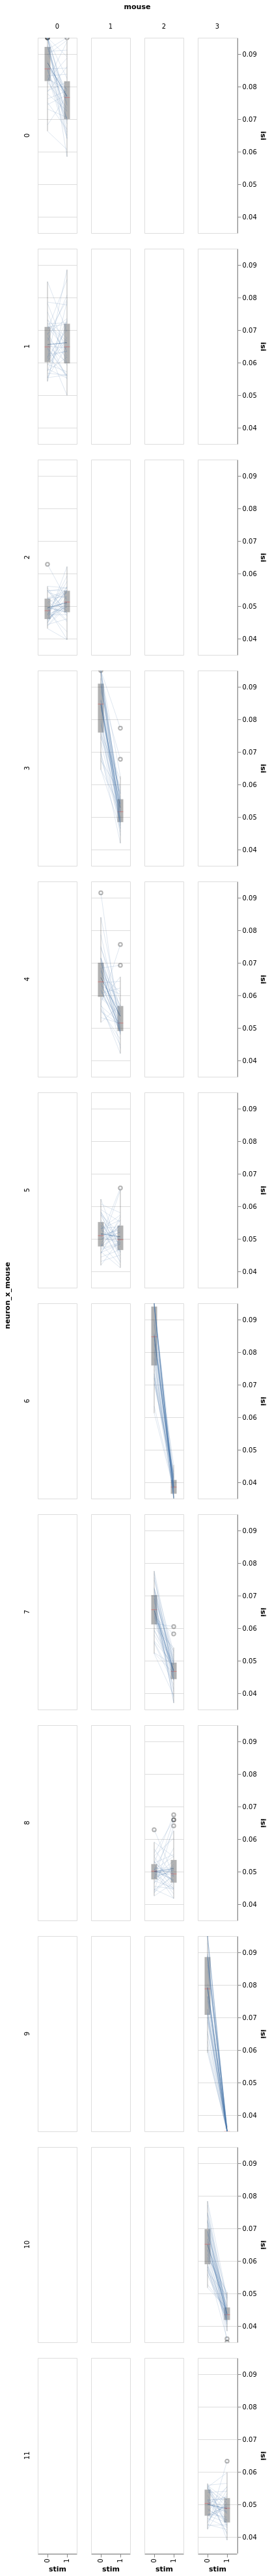

In [3]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.chart_data_box_for_detail_detail

In [4]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',)

n(Divergences) = 5
neuron_x_mouse:O


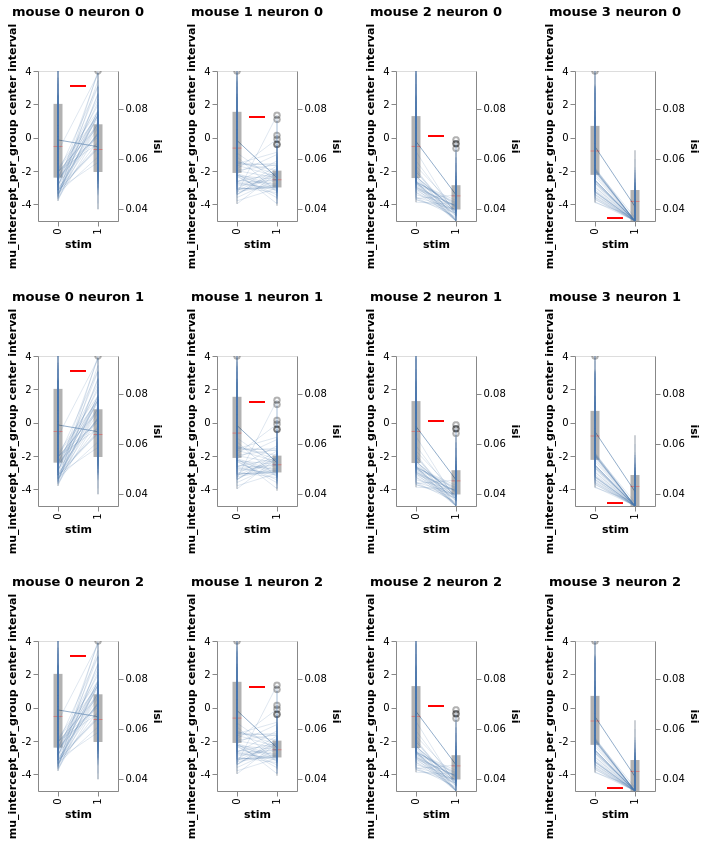

In [5]:
bw.plot_slopes_intercepts(row='neuron',column='mouse')

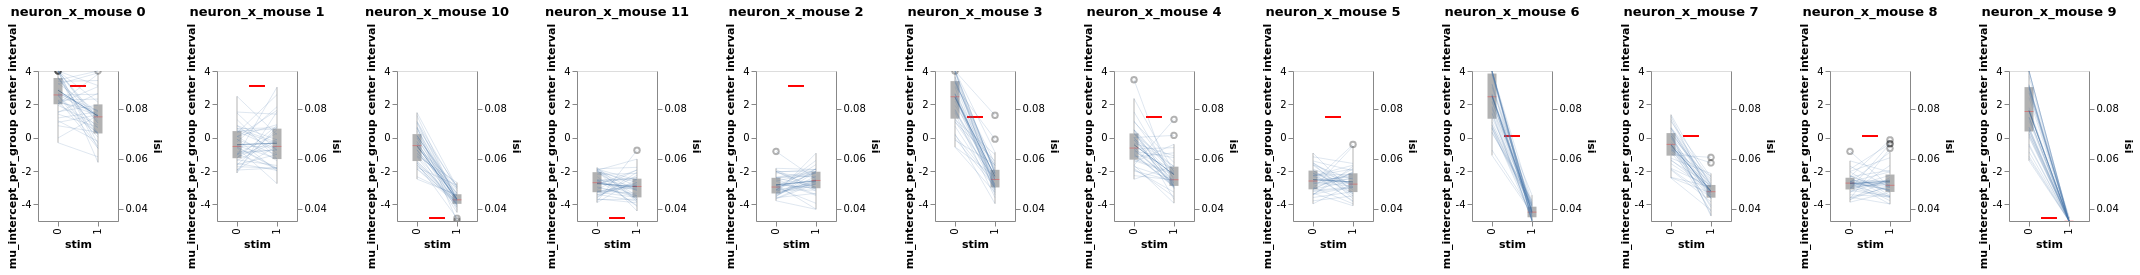

In [6]:
bw.plot_slopes_intercepts(column='neuron_x_mouse')

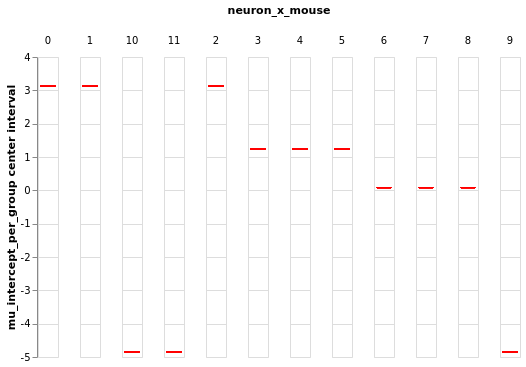

In [7]:
y='mu_intercept_per_group center interval'
posterior_intercept=alt.Chart(bw.data_and_posterior).mark_tick(color='red').encode(
    
y=alt.Y(y,
        scale=alt.Scale(domain=[bw.data_and_posterior[y].min(),bw.data_and_posterior[y].max()])
       )
)
posterior_intercept.facet(column='neuron_x_mouse')

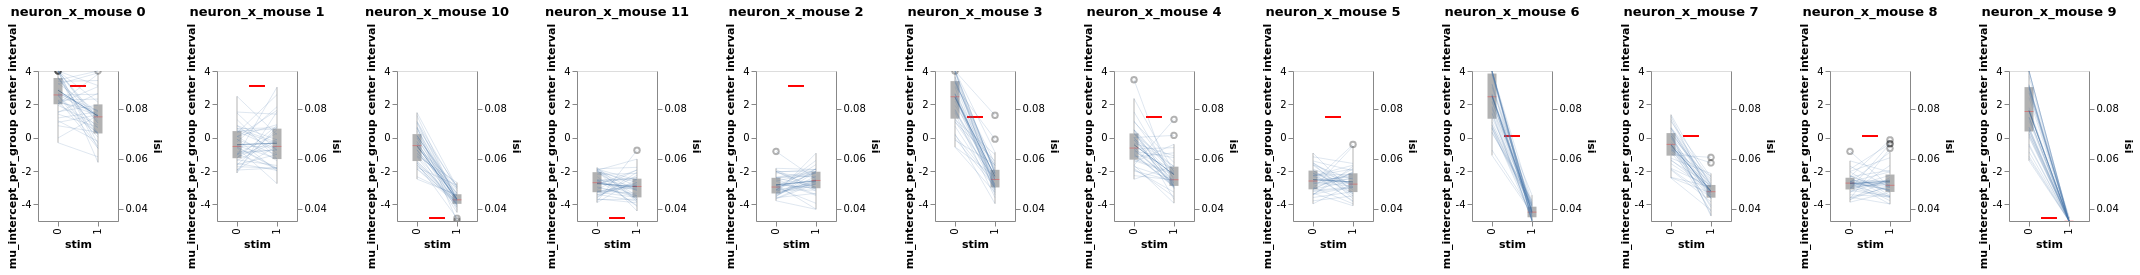

In [8]:
# Redo boxplot (no need to show)
bw.data_box_detail(data=bw.data_and_posterior,autofacet=False);

# bw.chart_data_box_for_detail_detail.facet(column='neuron_x_mouse')

chart=(posterior_intercept+bw.chart_data_box_for_detail_detail).resolve_scale(y='independent')
from bayes_window import visualization
visualization.facet(chart,column=bw.condition[0])

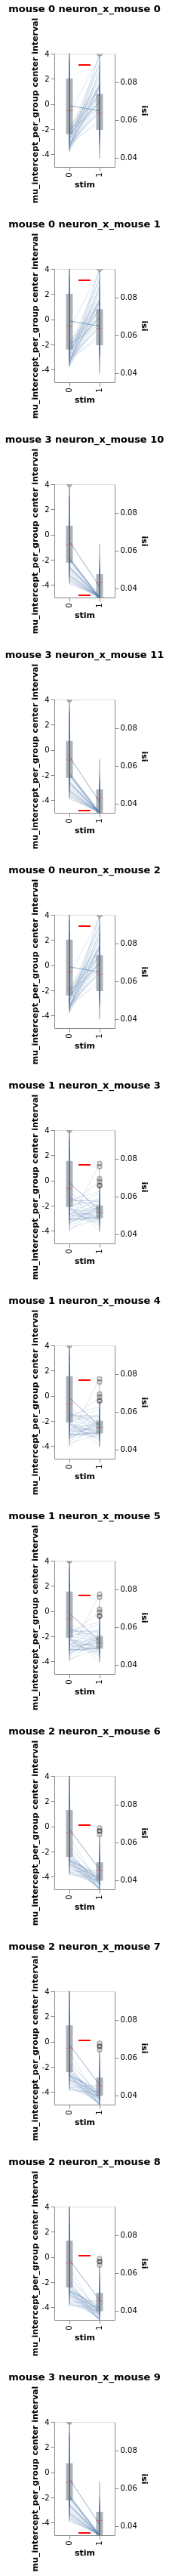

In [9]:
visualization.facet(chart, **visualization.auto_facet(bw.group, bw.condition))

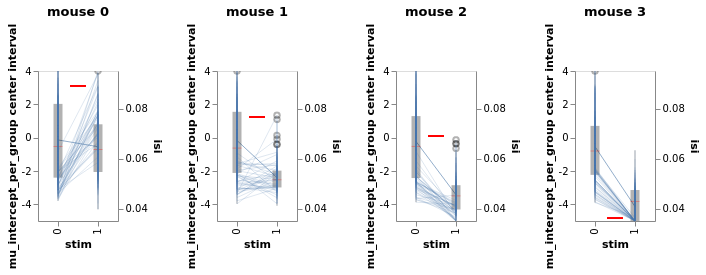

In [10]:
visualization.facet(chart,column='mouse')

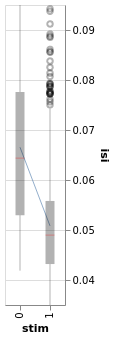

In [11]:
bw.chart_data_box_for_detail

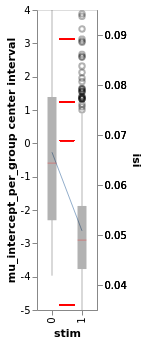

In [12]:
(bw.chart_data_box_for_detail+posterior_intercept).resolve_scale(y='independent')


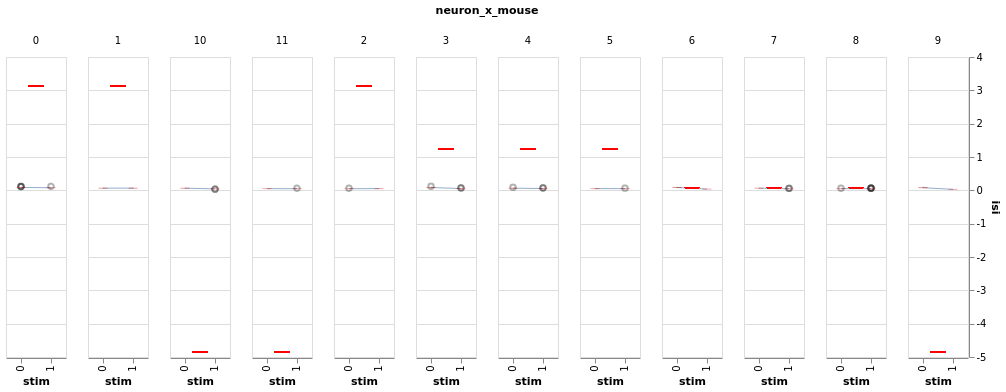

In [13]:
(bw.chart_data_box_for_detail+posterior_intercept).facet(column='neuron_x_mouse')


In [14]:
(bw.chart_data_box_for_detail+posterior_intercept).resolve_scale(y='independent').facet(column='mouse')

JavascriptError: Error: Unrecognized scale name: "child_layer_3_y"

alt.FacetChart(...)

TODO use magic faceter

# data_details

In [15]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

n(Divergences) = 5
neuron_x_mouse:O


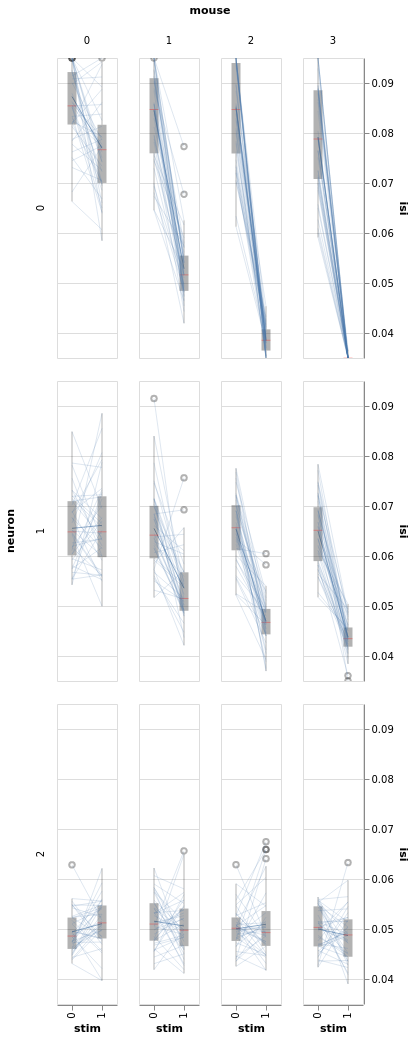

In [16]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_for_detail_detail

# Create_data_slopes

This should trigger a warning. 'i_trial' in detail=

n(Divergences) = 5
neuron_x_mouse:O


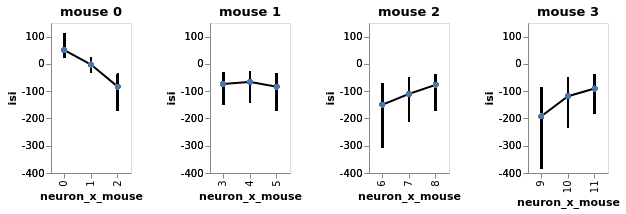

In [17]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse',));
bw.chart_posterior


No warning should be displayed below:

n(Divergences) = 5
neuron_x_mouse:O


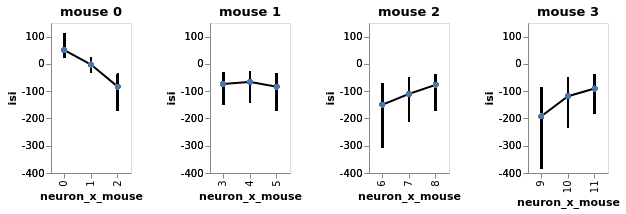

In [18]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial' )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract')

bw.chart_posterior


# data_details

In [19]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

n(Divergences) = 5
neuron_x_mouse:O


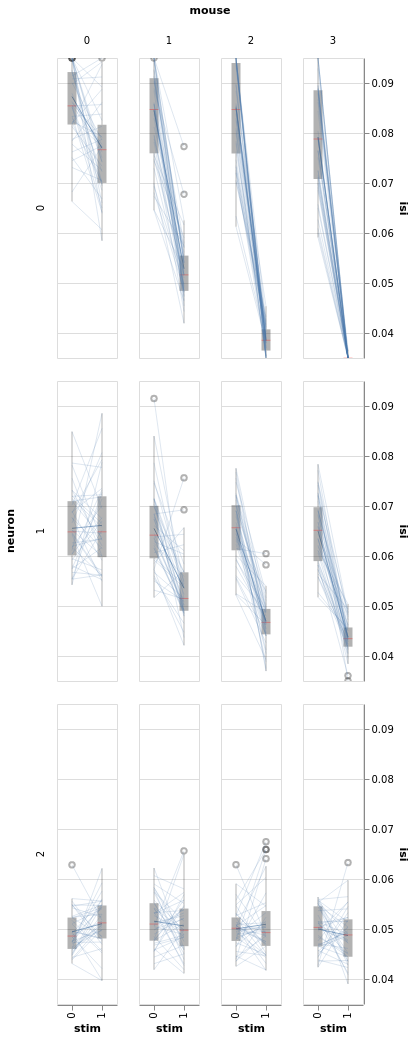

In [20]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_for_detail_detail

## Without detail:

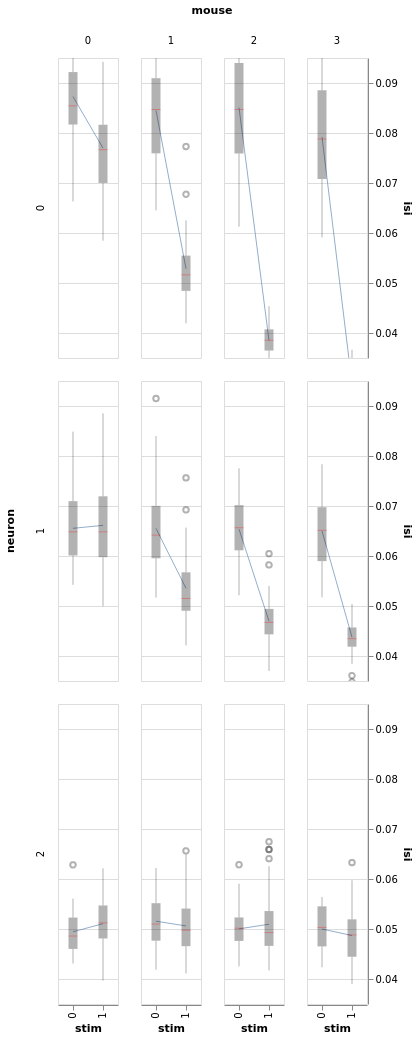

In [21]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', )
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_for_detail_detail

# Create_posterior_charts

In [22]:
df

,neuron_x_mouse,i_trial,neuron,stim,neuron_code,mouse_code,mouse,log_firing_rate,Firing rate,firing_rate,i_spike,isi,log_isi
0,m0bayes0,0,0,0,0,0,m0bayes,1.930590,85.229583,85.229583,51.5,0.068202,-1.166204
1,m0bayes0,0,0,1,0,0,m0bayes,2.016404,103.849360,103.849360,45.5,0.077291,-1.111872
2,m0bayes0,1,0,0,0,0,m0bayes,1.807702,64.224687,64.224687,36.0,0.096655,-1.014774
3,m0bayes0,1,0,1,0,0,m0bayes,1.942991,87.698236,87.698236,54.5,0.063939,-1.194234
4,m0bayes0,2,0,0,0,0,m0bayes,2.128728,134.501859,134.501859,42.0,0.082897,-1.081461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,m3bayes2,37,2,1,11,3,m3bayes,1.992988,98.398435,98.398435,68.0,0.051379,-1.289218
956,m3bayes2,38,2,0,11,3,m3bayes,1.849192,70.662981,70.662981,68.5,0.050242,-1.298931
957,m3bayes2,38,2,1,11,3,m3bayes,2.256378,180.458737,180.458737,73.0,0.047635,-1.322070
958,m3bayes2,39,2,0,11,3,m3bayes,2.266881,184.876199,184.876199,72.5,0.048391,-1.315237


In [23]:
reload(models)
reload(visualization)
reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              add_group_slope=False, center_intercept=True, center_slope=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))

n(Divergences) = 167
neuron_x_mouse:O


neuron:O


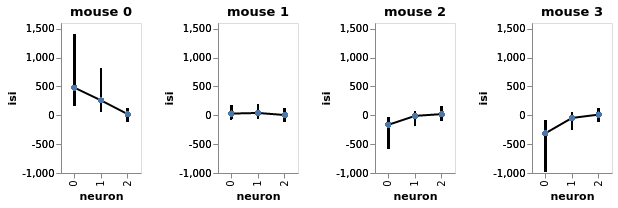

In [24]:
bw.make_regression_charts(x='neuron:O',column='mouse')

neuron:O


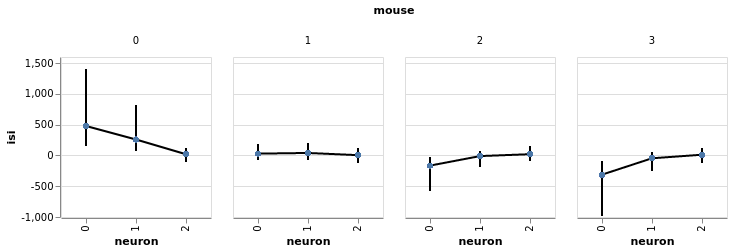

In [25]:
bw.plot_posteriors_slopes(x='neuron:O')
bw.facet(column='mouse')

TODO need to combine these two properly somehow

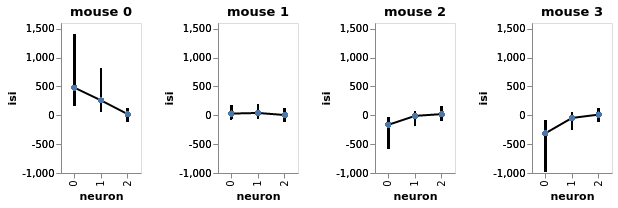

In [28]:
bw.chart_posterior

## More manual faceting and composing

n(Divergences) = 5
neuron_x_mouse:O
neuron:O


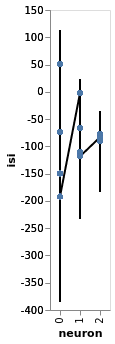

In [32]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.make_regression_charts(x='neuron:O')

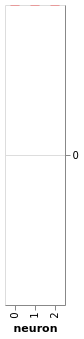

In [33]:
x='neuron'
y='isi diff'
alt.Chart(bw.data_and_posterior).mark_boxplot(
            clip=True, opacity=.3, size=9, color='black',
            median=alt.MarkConfig(color='red', strokeWidth=20)
        ).encode(
            x=x,
            y=alt.Y(f'{y}:Q',
                    axis=alt.Axis(orient='right', title=''),
                    )
        )

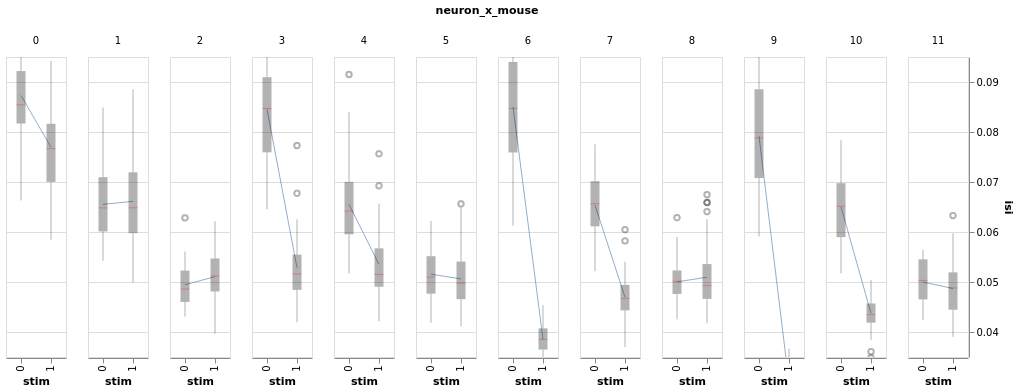

In [35]:
bw.chart_data_box_for_detail.facet(column='neuron_x_mouse')

In [37]:
(bw.chart_posterior+bw.chart_data_box_for_detail).facet(column='mouse')

JavascriptError: Error: Unrecognized scale name: "child_layer_0_y"

alt.FacetChart(...)

Fix:

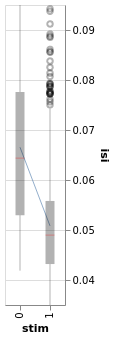

In [41]:
bw.chart_data_box_for_detail

In [ ]:
from bayes_window.visualization import facet
facet(alt.layer(bw.chart_data_box_for_detail,bw.chart_posterior).resolve_scale(y='independent'), column='mouse')

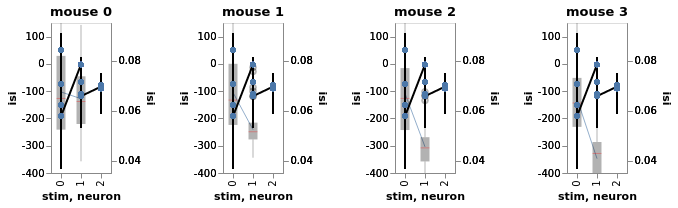

In [45]:
facet((bw.chart_data_box_for_detail+bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

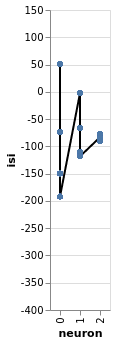

In [48]:
bw.charts[-1]

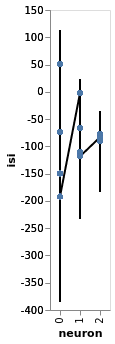

In [49]:
alt.layer(*bw.charts).resolve_scale(y='independent')

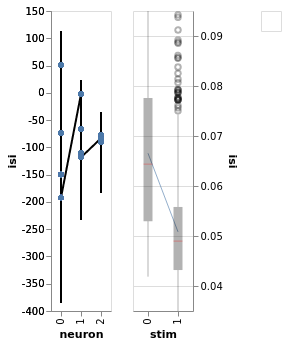

In [51]:
bw.chart_posterior|bw.chart_data_box_for_detail|bw.chart_posterior_kde

If x axis, can't use `+`. Must call `alt.layer()`:

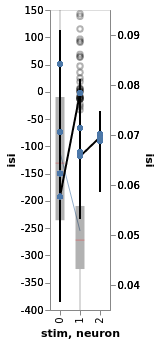

In [54]:
(bw.chart_data_box_for_detail+bw.chart_posterior).resolve_scale(y='independent')

In [55]:
(bw.chart_posterior+bw.chart_data_box_for_detail).facet(column='mouse').resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.FacetChart(...)

In [56]:
alt.layer(bw.chart_posterior,bw.chart_data_box_for_detail).resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.LayerChart(...)

neuron:O


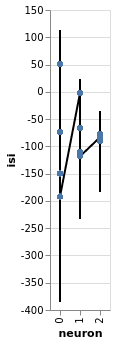

In [57]:
bw.plot(x='neuron:O')

n(Divergences) = 66
neuron:O
:O


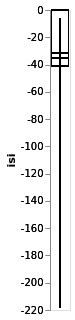

In [60]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))
bw.make_regression_charts()

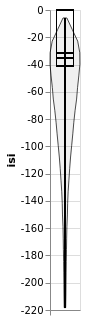

In [61]:
alt.layer(*bw.charts)

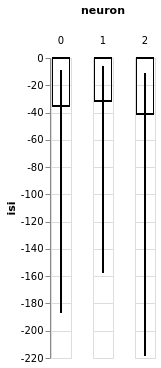

In [62]:
alt.layer(*bw.charts_for_facet).facet(column='neuron')

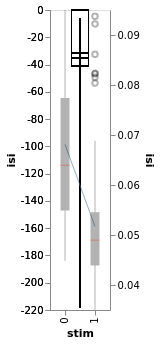

In [63]:
(bw.chart_posterior+bw.chart_data_box_for_detail).resolve_scale(y='independent')

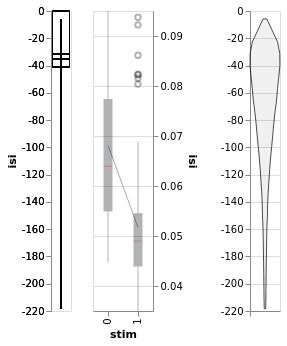

In [64]:
bw.chart_posterior|bw.chart_data_box_for_detail|bw.chart_posterior_kde

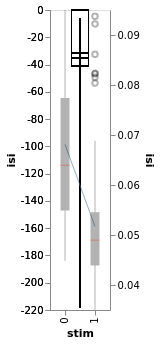

In [65]:
(bw.chart_posterior+bw.chart_data_box_for_detail).resolve_scale(y='independent')

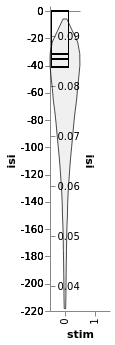

In [66]:
(bw.chart_posterior+bw.chart_data_box_for_detail+bw.chart_posterior_kde).resolve_scale(y='independent')

In [67]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
bw = BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))


n(Divergences) = 15
neuron_x_mouse:O


neuron:O


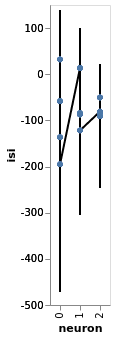

In [69]:
bw.make_regression_charts(x='neuron:O')

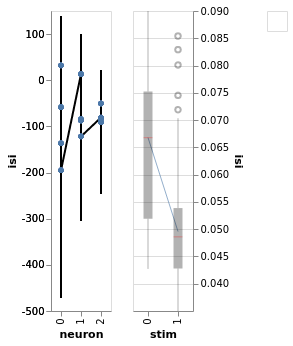

In [70]:
bw.chart_posterior|bw.chart_data_box_for_detail|bw.chart_posterior_kde

In [71]:
(bw.chart_posterior+bw.chart_data_box_for_detail).resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.LayerChart(...)

In [72]:
(bw.chart_posterior+bw.chart_data_box_for_detail).resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.LayerChart(...)

mouse:O
:O


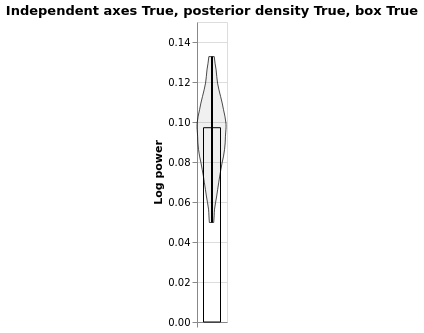

:O


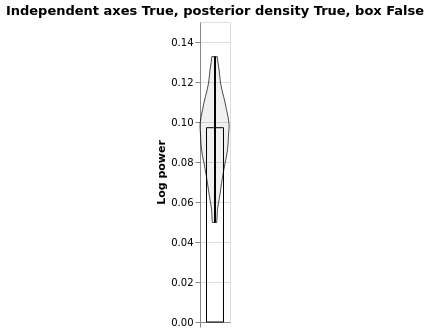

:O


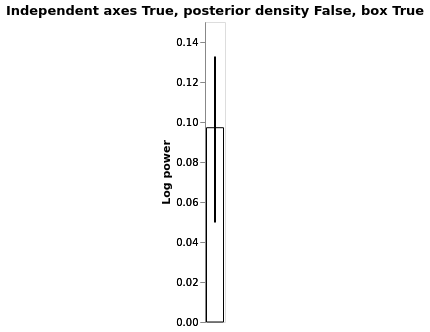

:O


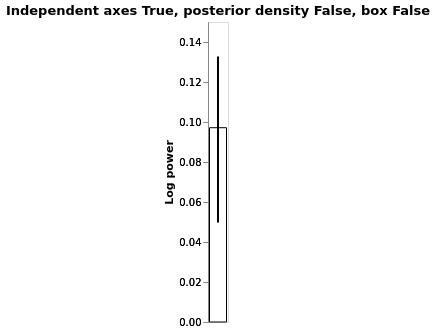

:O


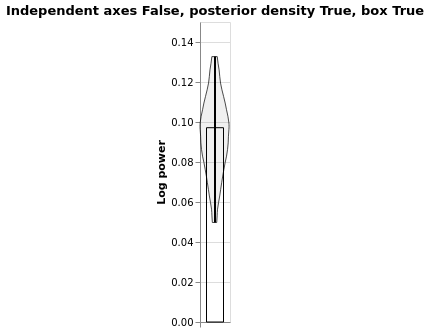

:O


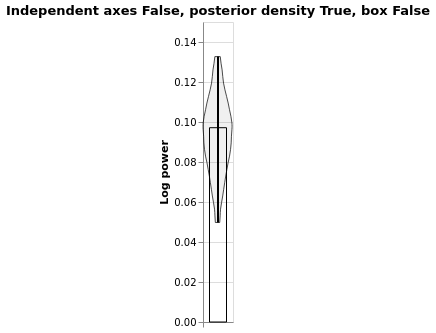

:O


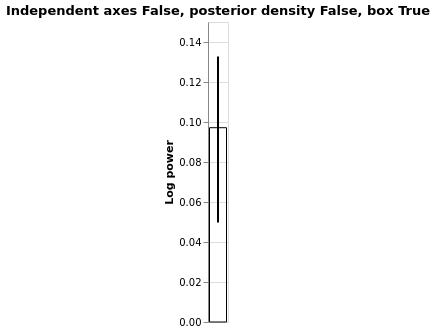

:O


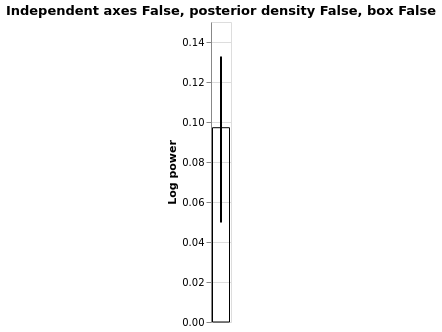

In [73]:
# Draw some fake data:
df1, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=9, n_trials=30)

# Show off all display methods:
import itertools 
# Initialize and fit again:
window=BayesWindow(df1, y='Log power', treatment='stim', group='mouse')
window.fit_slopes(model=models.model_hierarchical,add_group_slope=False,
                  do_make_change='subtract', dist_y='student');
# Plot:
for ia, ap, ab in itertools.product([True,False], [True,False], [True,False], ):
    window.plot(independent_axes=ia,x=':O',
                add_posterior_density=ap,add_box=ab
               ).properties(title=f'Independent axes {ia}, posterior density {ap}, box {ab}').display()